In [42]:
import pandas as pd
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import warnings
warnings.filterwarnings("ignore")
import random
from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
raw_data = "..\\data\\CombinedData.csv"
df = pd.read_csv(raw_data)
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [16]:
df.rename(columns={'statement': 'original_statement'}, inplace=True)

df['statement']=df['original_statement'].str.lower()
df.head()

,Unnamed: 0,original_statement,status,statement
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"trouble sleeping, confused mind, restless hear..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"all wrong, back off dear, forward doubt. stay ..."
3,3,I've shifted my focus to something else but I'...,Anxiety,i've shifted my focus to something else but i'...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"i'm restless and restless, it's been a month n..."


In [21]:
def remove_patterns(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# Apply the function to the 'statement' column
df['statement'] = df['statement'].fillna('')
df['statement'] = df['statement'].apply(remove_patterns)
df.head()

,Unnamed: 0,original_statement,status,statement
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...


In [22]:
# Apply word_tokenize to each element in the 'statement' column
df['tokens'] = df['statement'].apply(word_tokenize)
df.head()

,Unnamed: 0,original_statement,status,statement,tokens
0,0,oh my gosh,Anxiety,oh my gosh,"[oh, my, gosh]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ..."
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,..."
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo..."


In [23]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem tokens and convert them to strings
def stem_tokens(tokens):
    return ' '.join(stemmer.stem(str(token)) for token in tokens)

# Apply the function to the 'tokens' column
df['tokens_stemmed'] = df['tokens'].apply(stem_tokens)

df.head()

,Unnamed: 0,original_statement,status,statement,tokens,tokens_stemmed
0,0,oh my gosh,Anxiety,oh my gosh,"[oh, my, gosh]",oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...",troubl sleep confus mind restless heart all ou...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...",all wrong back off dear forward doubt stay in ...
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,...",ive shift my focu to someth els but im still w...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...",im restless and restless it been a month now b...


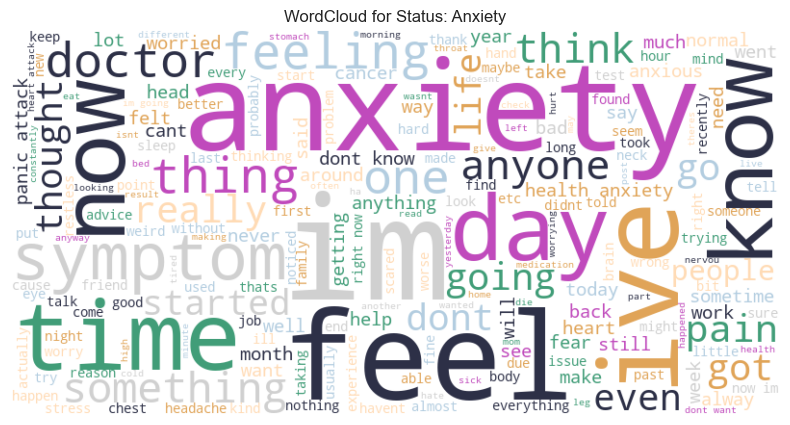

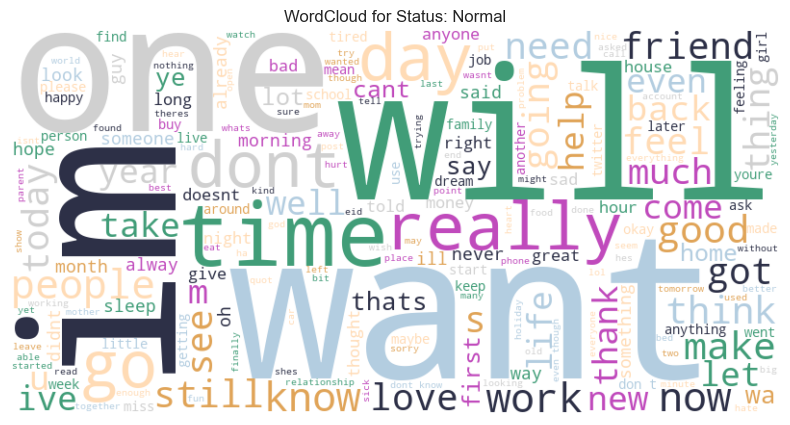

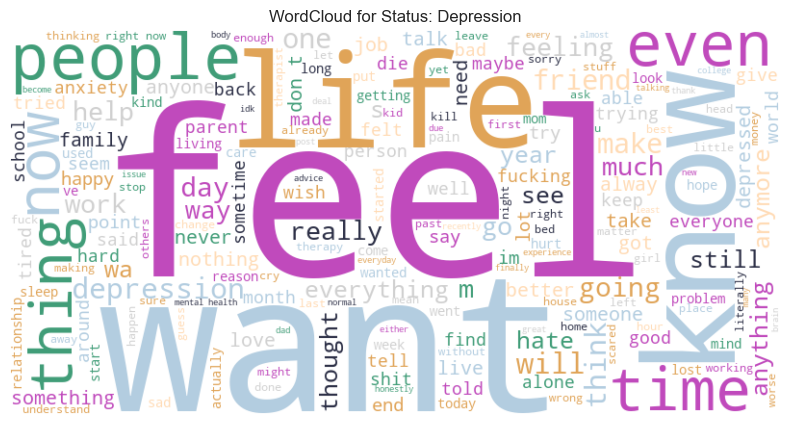

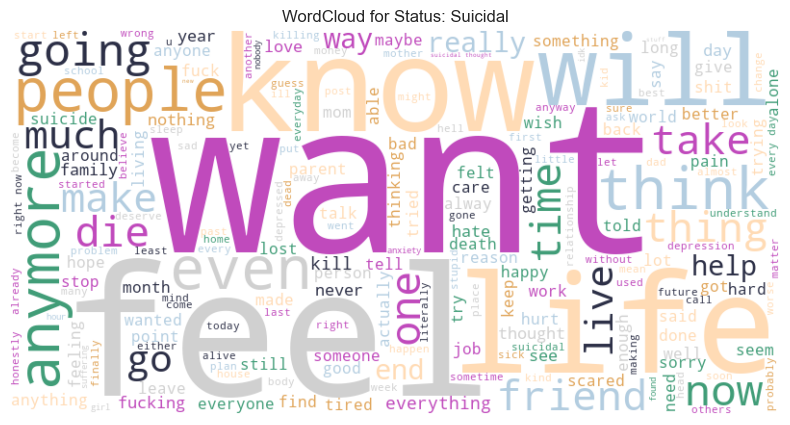

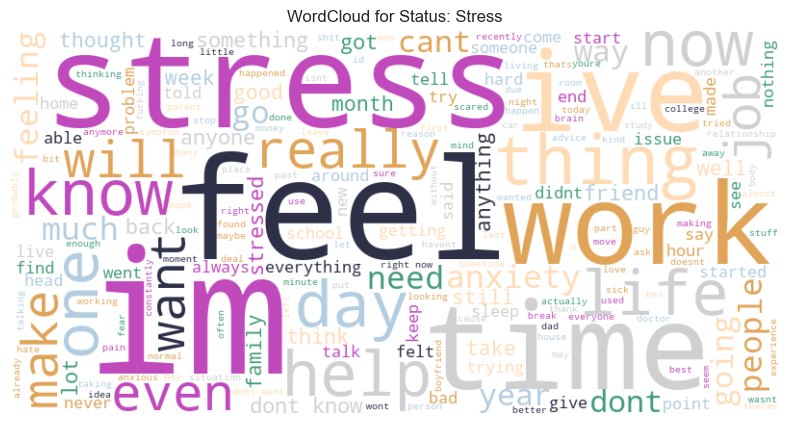

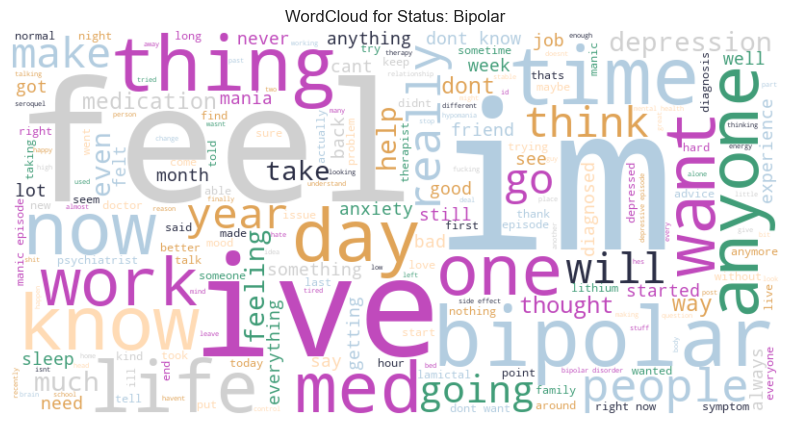

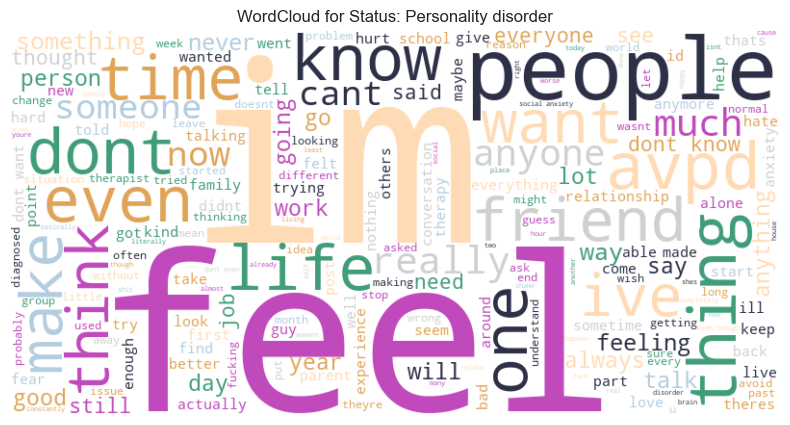

In [24]:
# Get unique categories in 'status'
statuses = df['status'].unique()

# Define a color function
def color_func(word, font_size, position, orientation, random_state=101, **kwargs):
    return random.choice(colors)

# Generate and plot the WordCloud for each category
for status in statuses:
    # Filter the tokens data for the current status
    tokens_data = ' '.join(df[df['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist())

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title(f'WordCloud for Status: {status}')
    plt.show()

In [33]:
# Calculate the number of characters and sentences
df['num_of_characters'] = df['statement'].str.len()
df['num_of_sentences'] = df['statement'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Generate descriptive statistics
description = df[['num_of_characters', 'num_of_sentences']].describe()

# Display the descriptive statistics
print(description)

       num_of_characters  num_of_sentences
count       53043.000000      53043.000000
mean          560.118885          0.993081
std           825.257184          0.082893
min             0.000000          0.000000
25%            74.000000          1.000000
50%           304.000000          1.000000
75%           730.000000          1.000000
max         31499.000000          1.000000


In [34]:
X = df[['tokens_stemmed', 'num_of_characters', 'num_of_sentences']]
y = df['status']

In [35]:
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(y.values)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens' column
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_train['tokens_stemmed'])
X_test_tfidf = vectorizer.transform(X_test['tokens_stemmed'])

# 2. Extract numerical features
X_train_num = X_train[['num_of_characters', 'num_of_sentences']].values
X_test_num = X_test[['num_of_characters', 'num_of_sentences']].values

# 3. Combine TF-IDF features with numerical features
X_train_combined = hstack([X_train_tfidf, X_train_num])
X_test_combined = hstack([X_test_tfidf, X_test_num])

print('Number of feature words: ', len(vectorizer.get_feature_names_out()))

Number of feature words:  50000


In [38]:
X_train_combined.shape

(42434, 50002)

In [39]:
# Apply Random Over-Sampling on the vectorized data
ros = RandomOverSampler(random_state=101)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_combined, y_train)

In [40]:
X_train_resampled.shape

(91693, 50002)

In [41]:
# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)    # This line creates y_train_encoded
y_test_encoded = le.transform(y_test)          # This line creates y_test_encoded

In [43]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             mean_squared_error, mean_absolute_error,
                             r2_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import numpy as np

# Define a dictionary of classifiers
classifiers = {
    'Bernoulli Naive Bayes': BernoulliNB(alpha=0.1, binarize=0.0),
    'Decision Tree': DecisionTreeClassifier(max_depth=9, min_samples_split=5, random_state=101),
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=101),
    'XGB': XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=500, random_state=101, tree_method='gpu_hist')
}

# === Linear Regression Model ===
print("\nTraining Linear Regression Model...")
linear_reg = LinearRegression()
linear_reg.fit(X_train_tfidf, y_train_encoded)

# Predictions (regression)
y_pred_lr = linear_reg.predict(X_test_tfidf)

# Convert to classes
y_pred_lr_classes = np.round(y_pred_lr).astype(int)
y_pred_lr_classes = np.clip(y_pred_lr_classes, 0, len(le.classes_)-1)

# Evaluation
print("\nLinear Regression Results:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_lr_classes))
print(classification_report(y_test_encoded, y_pred_lr_classes))

print("\nRegression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test_encoded, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test_encoded, y_pred_lr))
print("R-squared:", r2_score(y_test_encoded, y_pred_lr))

# === XGBoost Classifier (example use) ===
print("\nTraining XGBoost...")
xgb_reg = classifiers['XGB']
xgb_reg.fit(X_train_tfidf, y_train_encoded)
y_pred = xgb_reg.predict(X_test_tfidf)

print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))

# === Plotting: Classification Metrics Comparison ===
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
xgb_scores = [
    accuracy_score(y_test_encoded, y_pred),
    precision_score(y_test_encoded, y_pred, average='weighted'),
    recall_score(y_test_encoded, y_pred, average='weighted'),
    f1_score(y_test_encoded, y_pred, average='weighted')
]

lr_scores = [
    accuracy_score(y_test_encoded, y_pred_lr_classes),
    precision_score(y_test_encoded, y_pred_lr_classes, average='weighted'),
    recall_score(y_test_encoded, y_pred_lr_classes, average='weighted'),
    f1_score(y_test_encoded, y_pred_lr_classes, average='weighted')
]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, xgb_scores, width, label='XGBoost')
rects2 = ax.bar(x + width/2, lr_scores, width, label='Linear Regression')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison by Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

# === Plotting: Regression Metrics Comparison ===
reg_metrics = ['MSE', 'MAE', 'R-squared']
x = np.arange(len(reg_metrics))

xgb_reg_scores = [
    mean_squared_error(y_test_encoded, xgb_reg.predict(X_test_tfidf)),
    mean_absolute_error(y_test_encoded, xgb_reg.predict(X_test_tfidf)),
    r2_score(y_test_encoded, xgb_reg.predict(X_test_tfidf))
]

lr_reg_scores = [
    mean_squared_error(y_test_encoded, y_pred_lr),
    mean_absolute_error(y_test_encoded, y_pred_lr),
    r2_score(y_test_encoded, y_pred_lr)
]

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, xgb_reg_scores, width, label='XGBoost')
rects2 = ax.bar(x + width/2, lr_reg_scores, width, label='Linear Regression')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison by Regression Metrics')
ax.set_xticks(x)
ax.set_xticklabels(reg_metrics)
ax.legend()

fig.tight_layout()
plt.show()


Training Linear Regression Model...

Linear Regression Results:
Accuracy: 0.2566688660571213
              precision    recall  f1-score   support

           0       0.14      0.50      0.22       755
           1       0.14      0.21      0.17       590
           2       0.36      0.12      0.18      3128
           3       0.55      0.24      0.34      3252
           4       0.08      0.32      0.13       233
           5       0.16      0.27      0.20       519
           6       0.31      0.39      0.34      2132

    accuracy                           0.26     10609
   macro avg       0.25      0.29      0.23     10609
weighted avg       0.37      0.26      0.26     10609


Regression Metrics:
Mean Squared Error: 21.615592687256804
Mean Absolute Error: 3.3768498898047836
R-squared: -5.811374667865812

Training XGBoost...


XGBoostError: [12:34:55] C:\actions-runner\_work\xgboost\xgboost\src\tree\updater_gpu_hist.cu:847: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device